In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
salary_df = pd.read_csv('data/salaries.csv')
salary_df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [20]:
inputs = salary_df.drop('salary_more_then_100k', axis=1)
target = salary_df['salary_more_then_100k']

### Encoding the data using LabelEncoder, because the ML model can't handle string data.

In [21]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [22]:
inputs['le_company']=le_company.fit_transform(inputs['company'])
inputs['le_job']=le_job.fit_transform(inputs['job'])
inputs['le_degree']=le_degree.fit_transform(inputs['degree'])

In [23]:
inputs.head()

,company,job,degree,le_company,le_job,le_degree
0,google,sales executive,bachelors,3,2,0
1,google,sales executive,masters,3,2,1
2,google,business manager,bachelors,3,0,0
3,google,business manager,masters,3,0,1
4,google,computer programmer,bachelors,3,1,0


In [24]:
inputs['le_company'].unique()

array([3, 0, 2, 1, 4, 6, 5])

In [25]:
inputs.drop(['company', 'job', 'degree'], axis=1, inplace=True)
inputs.head()

,le_company,le_job,le_degree
0,3,2,0
1,3,2,1
2,3,0,0
3,3,0,1
4,3,1,0


In [26]:
model = DecisionTreeClassifier()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.1)

In [38]:
type(y_train)

pandas.core.series.Series

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
model.predict(X_test)

array([1, 1, 1, 1])

In [30]:
y_test

31    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [31]:
model.score(inputs, target)

1.0

In [32]:
y_predicted = model.predict(inputs)

In [33]:
cnf_mtrx = confusion_matrix(target, y_predicted)
cnf_mtrx

array([[13,  0],
       [ 0, 23]])

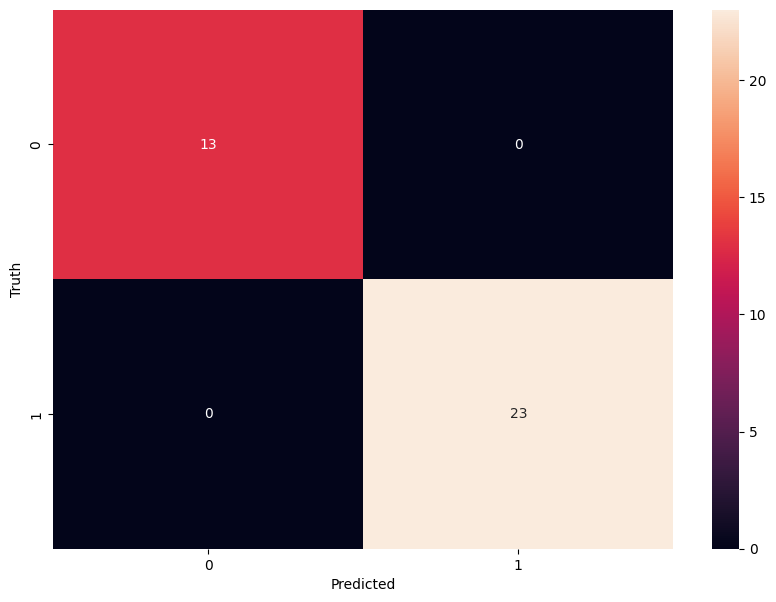

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(cnf_mtrx, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [35]:
type(y_train)

pandas.core.series.Series